In [5]:
import numpy as np
import pandas as pd
import backtrader as bt
from scipy import signal
import matplotlib.pyplot as plt
import datetime

In [14]:
stock = pd.read_csv('../data/inital_data/sh.600519.csv')
stock.rename(columns={'date':'datetime'},inplace=True)
stock.datetime = pd.to_datetime(stock.datetime)
stock

,datetime,code,open,high,low,close,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
0,2009-01-05,sh.600519,109.50,111.08,107.00,108.38,1350550,1.459418e+08,3,0.296745,1,-0.2944,23.326524,9.659027,11.039698,62.044866,0
1,2009-01-06,sh.600519,107.50,109.20,105.28,108.71,3815408,4.061131e+08,3,0.838328,1,0.3045,23.397550,9.688437,11.073312,62.233783,0
2,2009-01-07,sh.600519,108.92,109.00,106.70,106.79,1523802,1.642454e+08,3,0.334813,1,-1.7662,22.984310,9.517323,10.877739,61.134631,0
3,2009-01-08,sh.600519,105.25,108.57,104.20,108.53,1863467,1.986420e+08,3,0.409444,1,1.6294,23.358808,9.672395,11.054977,62.130738,0
4,2009-01-09,sh.600519,107.58,108.55,107.00,107.29,1180016,1.274457e+08,3,0.259275,1,-1.1425,23.091924,9.561884,10.928669,61.420868,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,2022-06-27,sh.600519,2019.94,2049.94,2000.30,2010.55,4011517,8.124449e+09,3,0.319300,1,0.0767,45.302583,12.214005,22.041375,94.486135,0
3275,2022-06-28,sh.600519,2019.74,2041.00,2001.00,2036.00,2524571,5.112299e+09,3,0.201000,1,1.2658,45.876033,12.368613,22.320380,95.682162,0
3276,2022-06-29,sh.600519,2028.00,2042.00,2011.01,2030.00,3036012,6.142508e+09,3,0.241700,1,-0.2947,45.740839,12.332163,22.254603,95.400191,0
3277,2022-06-30,sh.600519,2000.00,2077.00,1999.99,2045.00,3898243,7.984019e+09,3,0.310300,1,1.8259,46.078825,12.423287,22.419045,96.105118,0


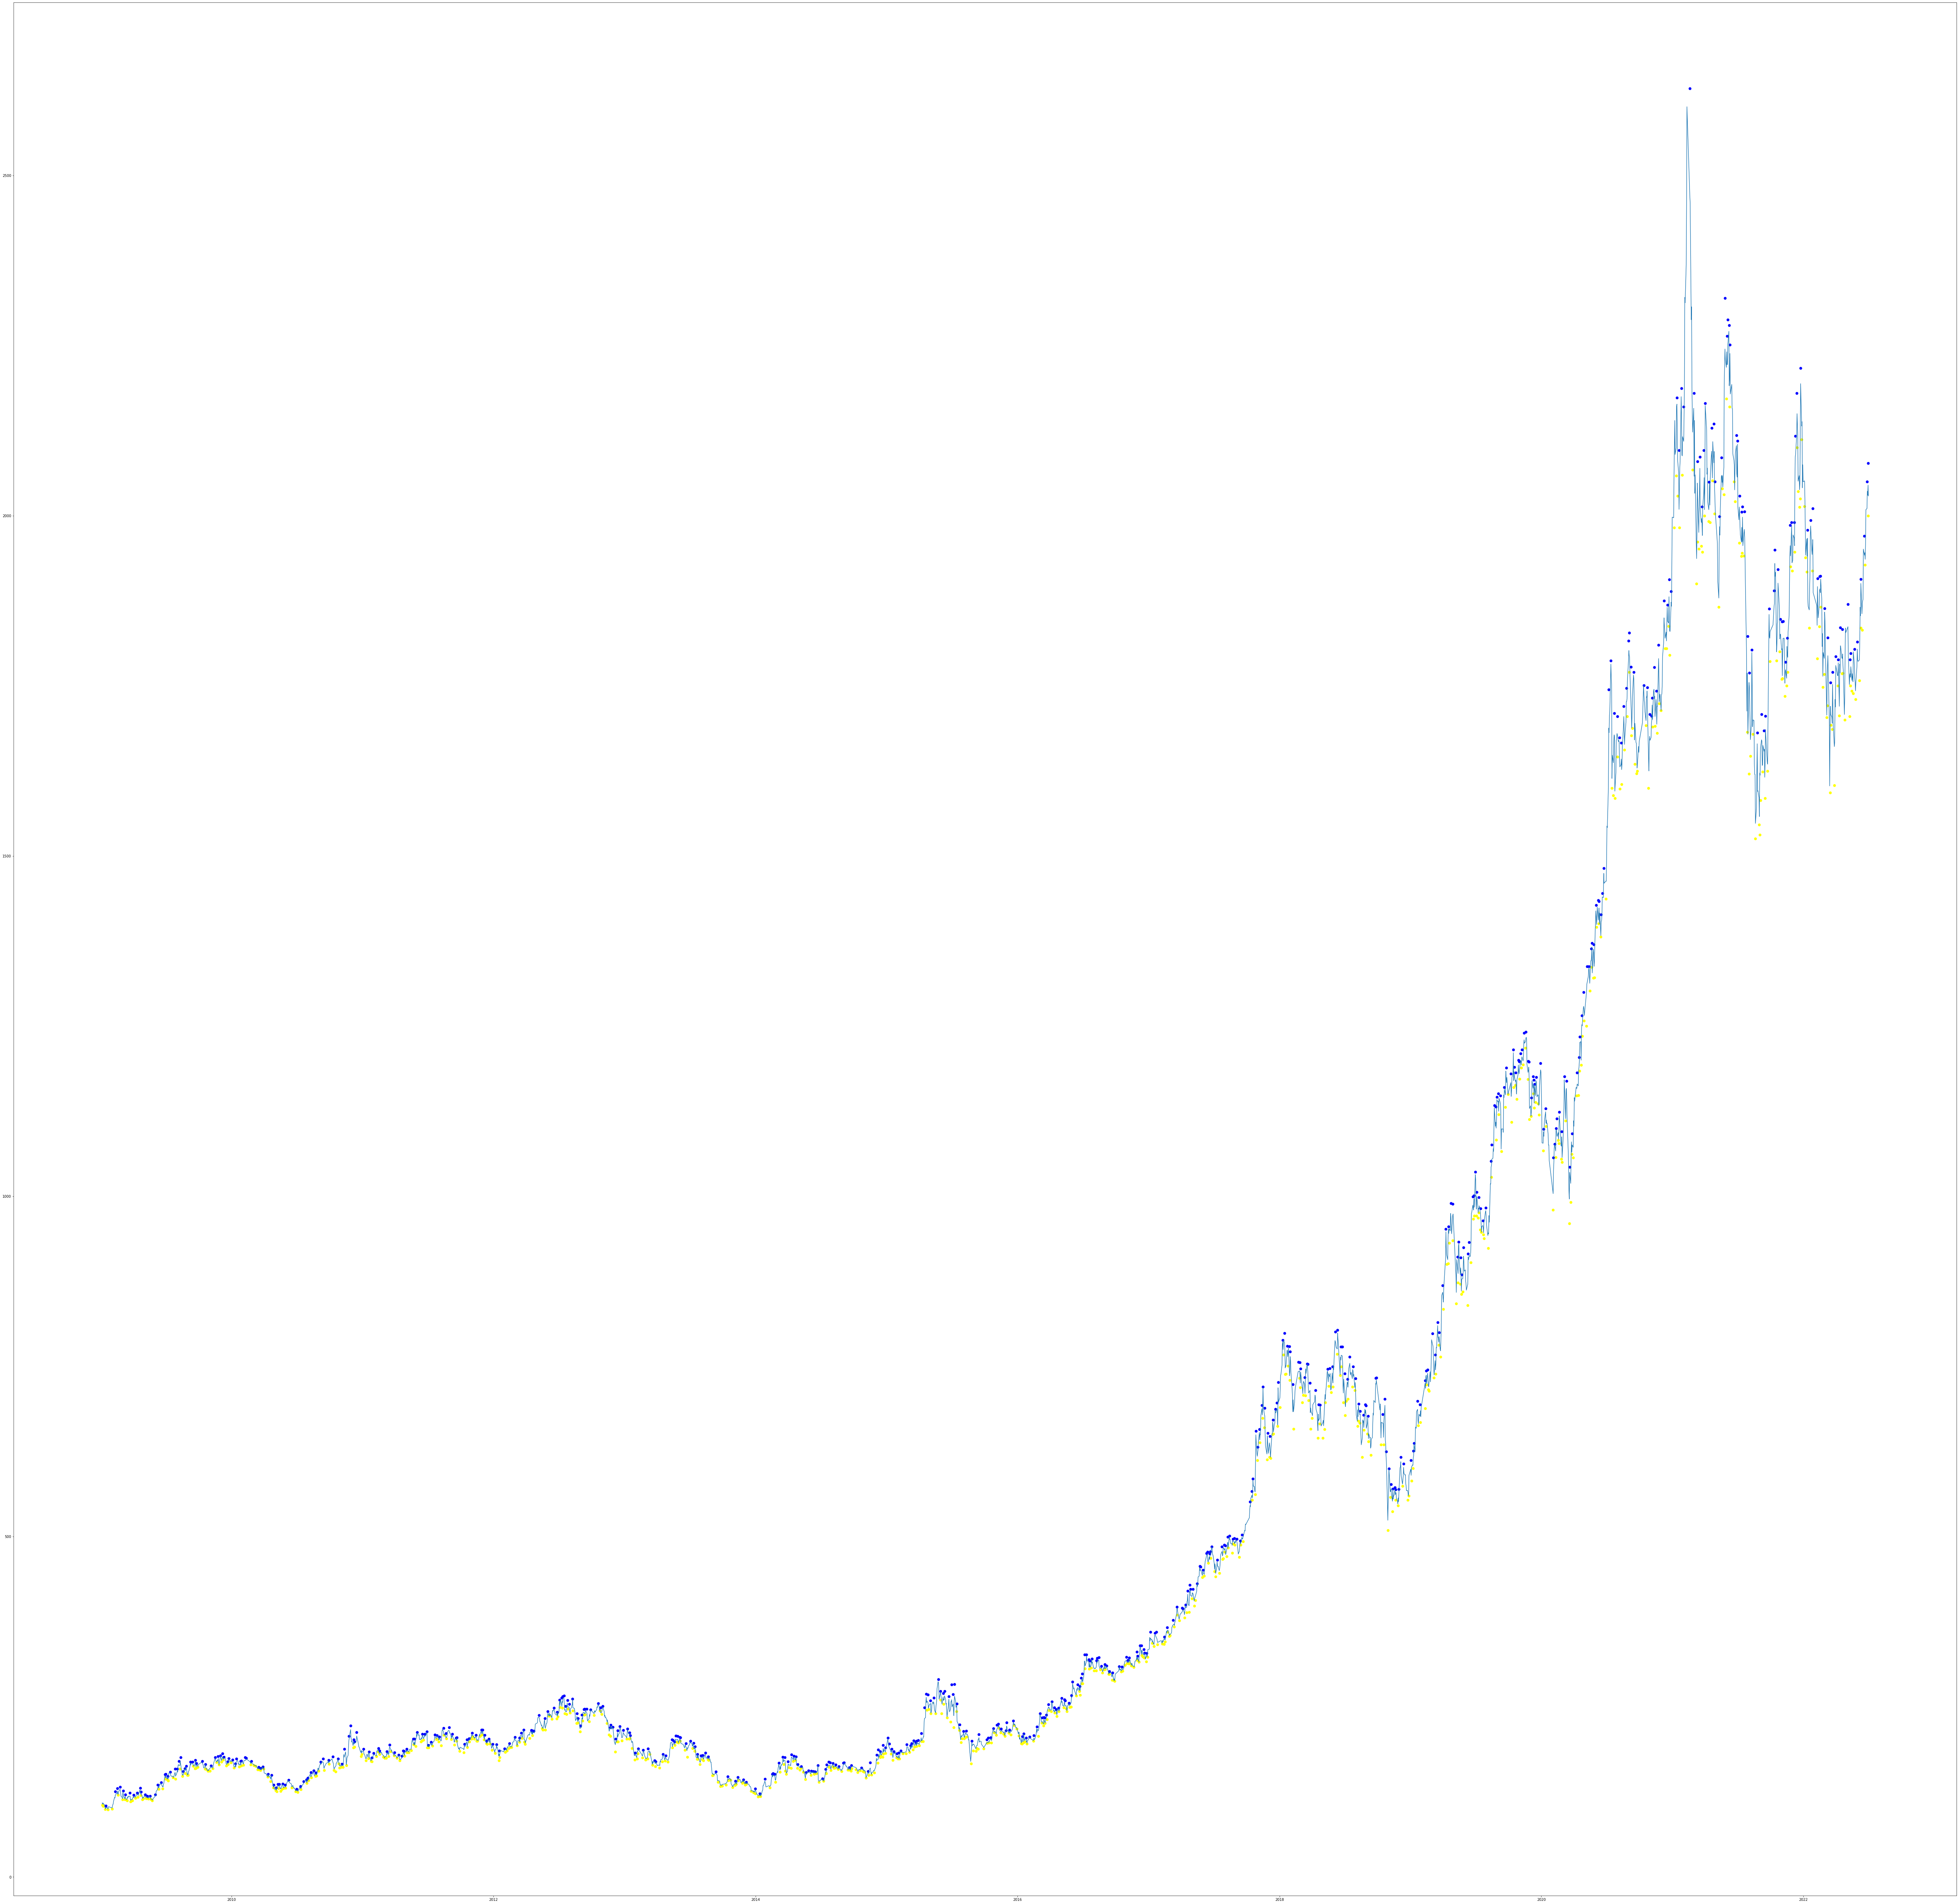

In [10]:
low = stock.low
high = stock.high
close = stock.close
dates = stock.datetime

date = [datetime.datetime.strptime(d, '%Y-%m-%d').date() for d in dates]


peaks_low,_ = signal.find_peaks(low*-1,prominence=0.2)
peaks_high,_ = signal.find_peaks(high,prominence=0.8)



plt.figure(figsize = (100,100))
plt.plot(date,close)
# plt.plot(low,color = 'green')
plt.scatter([datetime.datetime.strptime(d, '%Y-%m-%d').date() for d in dates[peaks_low]],low[peaks_low],color = 'yellow',s = 50)
# plt.plot(high,color = 'red')
plt.scatter([datetime.datetime.strptime(d, '%Y-%m-%d').date() for d in dates[peaks_high]],high[peaks_high],color = 'blue',s = 50)


plt.show()



初始资金: 1000000000
回测期间：20090101:20220701
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 4 Axes>]]

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


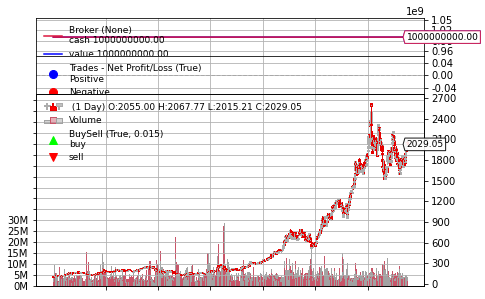

In [58]:
class my_strategy1(bt.Strategy):
    #全局设定交易策略的参数
    params=(
        ('maperiod',20),
           )

    def __init__(self):
        #指定价格序列
        self.dataclose=self.datas[0].close
        # 初始化交易指令、买卖价格和手续费
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.high_peak = 10000
        self.low_peak = 0
       
    def next(self):
        low_data = self.datas[0].lines.low.get(ago=0, size=180)
        high_data = self.datas[0].lines.high.get(ago=0, size=180)
        print('-----')
        high_peaks,_ = signal.find_peaks(high_data,prominence=0.8)
        
        low_peaks,_ = signal.find_peaks(np.negative(low_data),prominence=0.2)

    
        try:
            self.high_peak = high_data[high_peaks[-1]]
        except:pass
        try:
            self.low_peak = low_data[low_peaks[-1]]
        except:pass

        
        
        # 检查是否持仓   
        print(not self.position)
        if not self.position: # 没有持仓
            print(1)
            #执行买入条件判断：收盘价格上涨突破20日均线
            if self.dataclose[0] > self.high_peak:
                
                #执行买入
                # 获取当前的股票价格和账户余额
                price = self.dataclose[0]
                cash = self.broker.getcash()
                # 计算可以购买的股票数量
                size = int(cash / price)
                print(size)
                # 全仓买入
                self.order = self.buy(price=price,size=size)        
        else:
            print(2)
            #执行卖出条件判断：收盘价格跌破20日均线
            if self.dataclose[0] < self.low_peak:
                #执行卖出
                # 计算当前的持仓成本
                cost_basis = self.position.size * self.position.price
                # 获取当前的股票价格
                price = self.dataclose[0]
                # 计算当前的持仓市值
                market_value = self.position.size * price
                # 计算当前的总市值
                total_value = cost_basis + market_value
                # 全仓卖出
                self.order = self.sell(size=self.position.size, price=total_value)
        


#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']






#回测期间
start=datetime.datetime(2009, 1, 1)
end=datetime.datetime(2022, 7, 1)
# 加载数据
data = bt.feeds.PandasData(dataname=stock,fromdate=start,todate=end,datetime=0)


# 初始化cerebro回测系统设置                           
cerebro = bt.Cerebro()  
#将数据传入回测系统
cerebro.adddata(data) 
# 将交易策略加载到回测系统中
cerebro.addstrategy(my_strategy1) 
# 设置初始资本为10,000
startcash = 1000000000
cerebro.broker.setcash(startcash) 
# 设置交易手续费为 0.2%
cerebro.broker.setcommission(commission=0.002)

d1=start.strftime('%Y%m%d')
d2=end.strftime('%Y%m%d')
print(f'初始资金: {startcash}\n回测期间：{d1}:{d2}')
#运行回测系统
cerebro.run()
#获取回测结束后的总资金
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'总资金: {round(portvalue,2)}')



#%matplotlib inline #在jupyter notebook上运行
cerebro.plot(style='candlestick')


启动资金: 1000000.00
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
True
1
-----
Tr

<IPython.core.display.Javascript object>

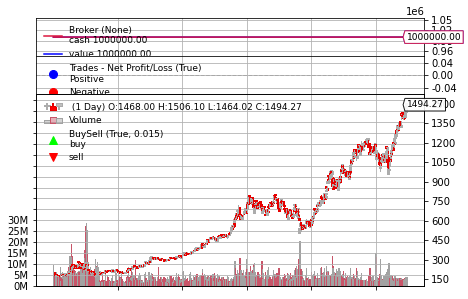

In [66]:
import backtrader as bt
import datetime
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'SimHei'

matplotlib.rcParams['font.size'] = 10

matplotlib.rcParams['axes.unicode_minus']=False
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']



class TestStrategy(bt.Strategy):
    """
    继承并构建自己的bt策略
    """

    def log(self, txt, dt=None, doprint=False):
        ''' 日志函数，用于统一输出日志格式 '''
        if doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):

        # 初始化相关数据
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.high_peak = 10000
        self.low_peak = 0
        
       

    def notify_order(self, order):
        """
        订单状态处理

        Arguments:
            order {object} -- 订单状态
        """
        if order.status in [order.Submitted, order.Accepted]:
            # 如订单已被处理，则不用做任何事情
            return

        # 检查订单是否完成
        if order.status in [order.Completed]:
            if order.isbuy():
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            self.bar_executed = len(self)

        # 订单因为缺少资金之类的原因被拒绝执行
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # 订单状态处理完成，设为空
        self.order = None

    def notify_trade(self, trade):
        """
        交易成果
        
        Arguments:
            trade {object} -- 交易状态
        """
        if not trade.isclosed:
            return

        # 显示交易的毛利率和净利润
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm), doprint=True)

    def next(self):
        
        if self.order:
            return

        low_data = self.datas[0].lines.low.get(ago=0, size=180)
        high_data = self.datas[0].lines.high.get(ago=0, size=180)
        print('-----')
        high_peaks,_ = signal.find_peaks(high_data,prominence=0.8)
        
        low_peaks,_ = signal.find_peaks(np.negative(low_data),prominence=0.2)

    
        try:
            self.high_peak = high_data[high_peaks[-1]]
        except:pass
        try:
            self.low_peak = low_data[low_peaks[-1]]
        except:pass

        
        
        # 检查是否持仓   
        print(not self.position)
        if not self.position: # 没有持仓
            print(1)
            #执行买入条件判断：收盘价格上涨突破20日均线
            if self.dataclose[0] > self.high_peak:
                
                #执行买入
                # 获取当前的股票价格和账户余额
                
                # 全仓买入
                cash = self.broker.getcash()
                price = self.dataclose[0]
                size = int(cash / price)
                self.order = self.buy(size=size)      
        else:
            print(2)
            #执行卖出条件判断：收盘价格跌破20日均线
            if self.dataclose[0] < self.low_peak:
                
                
                cash = self.broker.getcash()
                price = self.dataclose[0]
                size = self.position.size
                self.order = self.sell(size=size, price=price)
    def stop(self):
        self.log(u'(金叉死叉有用吗) Ending Value %.2f' %
                 (self.broker.getvalue()), doprint=True)


if __name__ == '__main__':

    # 初始化模型
    cerebro = bt.Cerebro()

    # 构建策略
    strats = cerebro.addstrategy(TestStrategy)
    # 每次买100股
    cerebro.addsizer(bt.sizers.FixedSize, stake=1000)

    # 加载数据到模型中
    #回测期间 
    start=datetime.datetime(2015, 1, 1)
    end=datetime.datetime(2020, 7, 1)
    data = bt.feeds.PandasData(dataname=stock,fromdate=start,todate=end,datetime=0)
    # 加载数据
    data =cerebro.adddata(data)

    # 设定初始资金和佣金
    startcash = 1000000.0
    cerebro.broker.setcash(startcash)
    cerebro.broker.setcommission(0.005)

    # 策略执行前的资金
    print('启动资金: %.2f' % cerebro.broker.getvalue())
    
    # 策略执行
    cerebro.run()
    cerebro.plot(style='candlestick')